In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pydataset import data
import os
import env
import acquire
import prepare
import wrangle as w

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = acquire.get_connection('zillow')

**bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips**
from the zillow database for all 'Single Family Residential' properties.


In [4]:
df = pd.read_sql("select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt,\
yearbuilt, taxamount, fips from properties_2017 join propertylandusetype \
using(propertylandusetypeid) where propertylandusedesc = 'Single Family Residential'", acquire.get_connection('zillow'))

In [5]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [6]:
df.shape

(2152863, 7)

In [7]:
# Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [8]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [9]:
# searching for nulls
df.isna().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [10]:
# nulls make up less than 1% of data. Dropping all nulls
df.dropna(inplace=True)

In [11]:
df.shape

(2140235, 7)

In [12]:
# new df / old df
2140235/2152863

0.9941343225277224

In [13]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [14]:
# Interesting, 4397 houses dont have rooms????
df[df['bedroomcnt'] == 0]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
15,0.0,0.0,203.0,14166.0,1960.0,163.79,6037.0
866,0.0,0.0,220.0,13840.0,1988.0,327.80,6037.0
2306,0.0,0.0,1776.0,79574.0,1989.0,1137.90,6037.0
...,...,...,...,...,...,...,...
2146660,0.0,0.0,676.0,234580.0,1922.0,3013.57,6037.0
2149054,0.0,0.0,938.0,56733.0,1978.0,986.86,6037.0
2152505,0.0,0.0,240.0,31234.0,1942.0,414.04,6037.0
2152704,0.0,1.0,1490.0,152000.0,1930.0,3614.40,6037.0


In [15]:
# mean house value
df.taxvaluedollarcnt.mean()

460641.6251640591

In [16]:
# most expensive
df.taxvaluedollarcnt.max()

90188462.0

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='Count'>

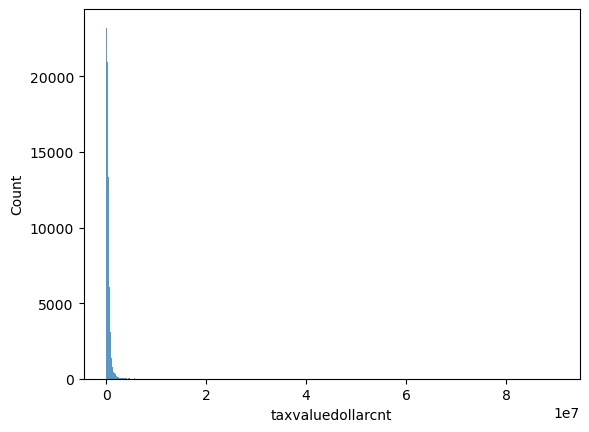

In [17]:
# histplot not very helpful for tax dollar value count
sns.histplot(x='taxvaluedollarcnt', data=df)

In [18]:
sns.boxplot(data=zillow)

NameError: name 'zillow' is not defined

In [24]:
# renaming columns
df = df.rename(columns = {'bedroomcnt': 'bedrooms', 
                         'bathroomcnt':'bathrooms', 
                         'calculatedfinishedsquarefeet':'sq_ft',
                         'taxvaluedollarcnt':'tax_value',
                          'taxamount':'tax_amount',
                         'yearbuilt':'year'})

In [25]:
df.head()

,bedrooms,bathrooms,sq_ft,tax_value,year,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [ ]:
cols = ['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'year', 'tax_amount', 'fips']

for col in cols:
    
    

In [33]:
# tax rate
df['tax_rate'] = df['tax_value']/ df['tax_amount'] * 100

In [34]:
df.head()

,bedrooms,bathrooms,sq_ft,tax_value,year,tax_amount,fips,tax_rate
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,0.427040
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,0.827501
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,0.816134
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0,0.581659
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0,0.271192
